Q.2)stochastic gradient descent and mini-batch gradient descent.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
import torch
import torch.nn as nn

In [3]:
#importing data
df = pd.read_excel("E:\ID5030\HW03\Concrete_Data.xls")
print('The shape of given data is:',df.shape)
df

The shape of given data is: (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
#obtaining target values
Y = df.iloc[:,8]
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [5]:
#obtaining feature values
X=df.iloc[:,:8]
print(f'Number of features in the given dataset is {X.shape[1]}')
X

Number of features in the given dataset is 8


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.30,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
#print(y_train.shape)
print(f'The shape of test data is:{x_test.shape}')
#print(y_test.shape)
x_train=np.array(x_train)
y_train = np.array(y_train)
y_train[0]
x_test=np.array(x_test)
y_test = np.array(y_test)

The shape of training data is:(721, 8)
The shape of test data is:(309, 8)


In [7]:
#NORMALISATION OF DATA
def normalise_features(x):
    mu = np.mean(x,axis=0)
    sd = np.std(x,axis=0)
    x_norm=(x-mu)/sd
    return(x_norm,mu,sd)

In [8]:
#Train data normalisation
x_train_norm,meantrain_norm,sdtrain_norm=normalise_features(x_train)
#Test data normalisation
x_test_norm = (x_test-meantrain_norm)/sdtrain_norm

In [9]:
#Finding cost value
def cost_function(x,y,w,b):
    cost = 0.0
    m = x.shape[0]
    for i in range(m):
        ypred=np.dot(x[i],w) + b
        cost  = cost + (y[i]-ypred)**2
    cost = cost/(2*m)
    return cost

In [10]:
def stochastic_gradient(x,y,w,b,alpha):
    m,n = x.shape
    dj_dw=np.zeros(n)
    dj_db=0
    for i in range(m):
        for j in range(n):
            err = (np.dot(x[i],w)+b)-y[i]
            dj_dw[j] = err*x[i,j]
            dj_db = err
        w = w-alpha*dj_dw
        b=b-alpha*dj_db
    return w,b 

In [16]:
def stochastic_gradient_descent(x,y,w_in,b_in,stochastic_gradient_function,alpha,num_iters,cost_function):
  J=[]
  w = w_in
  b = b_in
  m,n=x.shape
  for i in range(num_iters):
        w,b = stochastic_gradient(x,y,w,b,alpha)
        J.append(cost_function(x,y,w,b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"epochs {i:4d}: mean squared error {2*J[-1]:8.2f}   ")
      
  return w,b,J


Learningrate=1e-05
epochs    0: mean squared error  1529.65   
epochs  300: mean squared error   129.00   
epochs  600: mean squared error   107.92   
epochs  900: mean squared error   106.22   
epochs 1200: mean squared error   105.39   
epochs 1500: mean squared error   104.86   
epochs 1800: mean squared error   104.49   
epochs 2100: mean squared error   104.20   
epochs 2400: mean squared error   103.97   
epochs 2700: mean squared error   103.77   
Mean square error of test data is: 121.49643589351852
Feature weights after training:[10.12072655  6.30169539  3.35494242 -5.30012009  1.83682358 -0.99629929
 -1.31840758  7.10811268]
The bias term after training: 35.565264448952306
Learningrate=0.0001
epochs    0: mean squared error  1354.42   
epochs  300: mean squared error   103.61   
epochs  600: mean squared error   102.80   
epochs  900: mean squared error   102.61   
epochs 1200: mean squared error   102.56   
epochs 1500: mean squared error   102.55   
epochs 1800: mean square

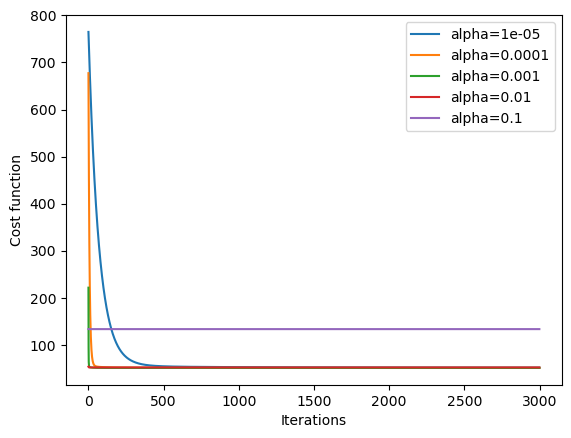

In [17]:
#stochastic gradient descent for Train data with normalisation
alphanorm=0.00001
m,n =x_train_norm.shape
w_initial=np.zeros(n)
b_initial=0
cost_norm_test_full=[]
while alphanorm <=0.1:
    iterationsnorm=3000
    print(f'Learningrate={alphanorm}')
    wnorm_final,bnorm_final,Jnorm_final = stochastic_gradient_descent(x_train_norm,y_train,w_initial,b_initial,
                                                stochastic_gradient,alphanorm,iterationsnorm,cost_function)
    costnorm_test = cost_function(x_test_norm,y_test,wnorm_final,bnorm_final)
    msenorm_test=costnorm_test*2
    cost_norm_test_full.append(costnorm_test)
    print(f'Mean square error of test data is: {msenorm_test}')
    print(f'Feature weights after training:{wnorm_final}')
    print(f'The bias term after training: {bnorm_final}')
    plt.plot(Jnorm_final,label=f'alpha={alphanorm}')
    plt.legend()
    alphanorm=alphanorm*10
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

In [18]:
#stochastic gradient for Test data with normalisation
alpha=0.00001
for i in cost_norm_test_full:
    print(f'alpha:{alphanorm}  Mean square error for test data:{2*i}')
    alphanorm=alphanorm*10

alpha:1.0  Mean square error for test data:121.49643589351852
alpha:10.0  Mean square error for test data:120.20523737733026
alpha:100.0  Mean square error for test data:120.43193479968843
alpha:1000.0  Mean square error for test data:126.74563424319179
alpha:10000.0  Mean square error for test data:375.94492086256815


In [12]:
#Creating tensors
m,n=x_train_norm.shape
X_train_norm = torch.from_numpy(x_train_norm.astype(np.float32))
Y_train = torch.from_numpy(y_train.astype(np.float32))
X_test_norm = torch.from_numpy(x_test_norm.astype(np.float32))
Y_test = torch.from_numpy(y_test.astype(np.float32))
Y_train = Y_train.view(m,1)
Y_test = Y_test.view(Y_test.shape[0],1)
print(Y_train.shape)
print(X_train_norm.shape)
print(Y_test.shape)
print(X_test_norm.shape)


torch.Size([721, 1])
torch.Size([721, 8])
torch.Size([309, 1])
torch.Size([309, 8])


In [13]:
#Creating a Linear Regression Model
m,n=X_train_norm.shape
input_size=n
output_size=1
model=nn.Linear(input_size,output_size)
mse =nn.MSELoss()

Learningrate=1e-05
epochs    0: mean squared error  1530.56   
epochs   50: mean squared error   442.25   
epochs  100: mean squared error   189.16   
epochs  150: mean squared error   128.62   
epochs  200: mean squared error   113.45   
epochs  250: mean squared error   109.21   
epochs  300: mean squared error   107.71   
epochs  350: mean squared error   106.96   
epochs  400: mean squared error   106.46   
epochs  450: mean squared error   106.09   
Mean square error of test data is: 123.74932098388672
Feature weights after training:[ 8.292212   4.5342436  1.4960791 -5.667552   2.8163598 -1.7729664
 -2.640177   6.9654083]
The bias term after training: 35.54106521606445
Learningrate=0.0001
epochs    0: mean squared error   105.96   
epochs   50: mean squared error   104.45   
epochs  100: mean squared error   103.80   
epochs  150: mean squared error   103.41   
epochs  200: mean squared error   103.17   
epochs  250: mean squared error   103.02   
epochs  300: mean squared error  

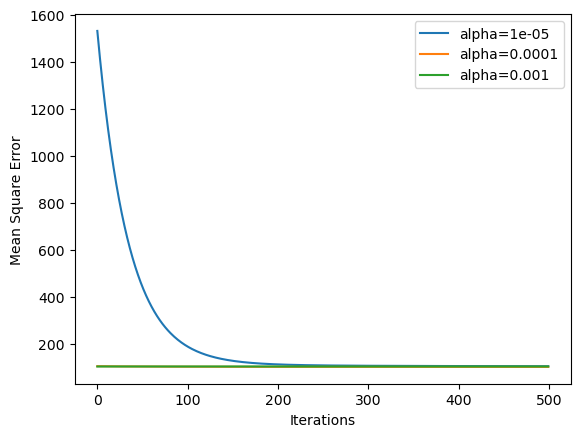

In [14]:
#stochastic gradient descent for Train data with normalisation
alphanorm=0.00001
Loss_norm_test_full=[]
iterationsnorm=500
input_size=n
output_size=1
model=nn.Linear(input_size,output_size)
while alphanorm <=0.001:
    optimizer = torch.optim.SGD(model.parameters(),lr=alphanorm)
    print(f'Learningrate={alphanorm}')
    J=[]
    for i in range(iterationsnorm):
        cost=0
        for x_i,y_i in zip(X_train_norm,Y_train):
            pred_i = model(x_i)
            loss = mse(pred_i,y_i)
            cost=cost+loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        J.append(cost/m)
        if i% math.ceil(iterationsnorm / 10) == 0:
            print(f"epochs {i:4d}: mean squared error {J[-1]:8.2f}   ")
    Y_test_predicted = model(X_test_norm)
    loss_norm_test = mse(Y_test,Y_test_predicted)
    Loss_norm_test_full.append(loss_norm_test)
    w_norm_final,b_norm_final=model.parameters()
    w_norm_final=w_norm_final.detach().numpy().squeeze()
    b_norm_final=b_norm_final.detach().numpy().squeeze()
    print(f'Mean square error of test data is: {loss_norm_test}')
    print(f'Feature weights after training:{w_norm_final}')
    print(f'The bias term after training: {b_norm_final}')
    plt.plot(J,label=f'alpha={alphanorm}')
    plt.legend()
    alphanorm=alphanorm*10
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.show()


In [19]:
#stochastic gradient descent for Test data with normalisation
alpha=0.00001
for i in Loss_norm_test_full:
    print(f'alpha:{alphanorm}  Mean square error for test data:{i}')
    alphanorm=alphanorm*10

alpha:100000.0  Mean square error for test data:123.74932098388672
alpha:1000000.0  Mean square error for test data:120.30116271972656
alpha:10000000.0  Mean square error for test data:120.90867614746094


In [20]:
def mini_batch_gradient(x,y,w,b,alpha,batch_size):
    m,n = x.shape
    dj_dw=np.zeros(n)
    dj_db=0
    num_points=0
    for i in range(m):
        for j in range(n):
            err = (np.dot(x[i],w)+b)-y[i]
            dj_dw[j] = dj_dw[j] + err*x[i,j]
            dj_db = dj_db + err
        num_points = num_points+1
        if num_points%batch_size==0:
            dj_dw = dj_dw/batch_size
            dj_db = dj_db/batch_size
            w = w-alpha*dj_dw
            b=b-alpha*dj_db
            dj_dw=np.zeros(n)
            dj_db=0
    return w,b

In [21]:
def mini_batch_gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,batch_size):
    w=w_in
    b=b_in
    J=[]
    for i in range(num_iters):
        w,b = mini_batch_gradient(x,y,w,b,alpha,batch_size)
        mse = cost_function(x,y,w,b)
        J.append(mse)
        if i% math.ceil(num_iters / 10) == 0:
            print(f"epochs {i:4d}: mean squared error {2*J[-1]:8.2f}   ")
      
    return w,b,J

Learningrate=0.01
epochs    0: mean squared error   450.74   
epochs  150: mean squared error   104.08   
epochs  300: mean squared error   103.09   
epochs  450: mean squared error   102.76   
epochs  600: mean squared error   102.65   
epochs  750: mean squared error   102.61   
epochs  900: mean squared error   102.60   
epochs 1050: mean squared error   102.60   
epochs 1200: mean squared error   102.59   
epochs 1350: mean squared error   102.59   
Mean square error of test data is: 119.88308732481778
Feature weights after training:[12.72993999  8.66863941  5.73909847 -3.19102227  1.85003605  0.93681052
  1.11715052  7.09051651]
The bias term after training: 35.58617594581765
Learningrate=0.1
epochs    0: mean squared error   126.60   
epochs  150: mean squared error   102.66   
epochs  300: mean squared error   102.65   
epochs  450: mean squared error   102.65   
epochs  600: mean squared error   102.65   
epochs  750: mean squared error   102.65   
epochs  900: mean squared err

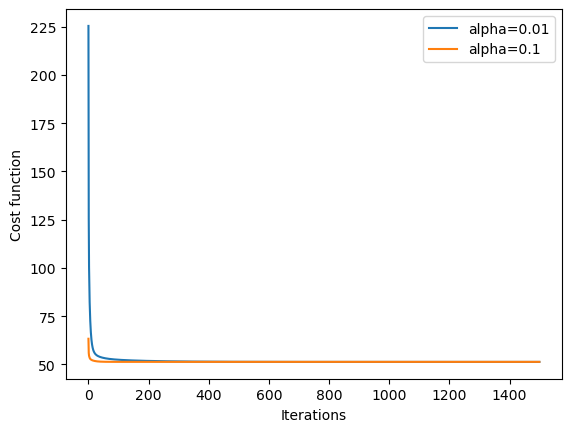

In [23]:
#Mini batch gradient descent for Train data with normalisation
alphanorm=0.01
w_initial=np.zeros(x_train_norm.shape[1])
b_initial=0
batch_size=64
cost_norm_test_full=[]
while alphanorm <=0.1:
    iterationsnorm=1500
    print(f'Learningrate={alphanorm}')
    wnorm_final,bnorm_final,Jnorm_final = mini_batch_gradient_descent(x_train_norm,y_train,w_initial,b_initial,alphanorm,
                                                          iterationsnorm,cost_function,batch_size)
    costnorm_test = cost_function(x_test_norm,y_test,wnorm_final,bnorm_final)
    msenorm_test=costnorm_test*2
    cost_norm_test_full.append(costnorm_test)
    print(f'Mean square error of test data is: {msenorm_test}')
    print(f'Feature weights after training:{wnorm_final}')
    print(f'The bias term after training: {bnorm_final}')
    plt.plot(Jnorm_final,label=f'alpha={alphanorm}')
    plt.legend()
    alphanorm=alphanorm*10
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

In [24]:
#Mini batch gradient for Test data with normalisation
alphanorm=0.01
for i in cost_norm_test_full:
    print(f'alpha:{alphanorm}  Mean square error for test data:{2*i}')
    alphanorm=alphanorm*10

alpha:0.01  Mean square error for test data:119.88308732481778
alpha:0.1  Mean square error for test data:119.53116349333632


Learningrate=1e-06
epochs    0: mean squared error  1483.98   
epochs  100: mean squared error  1143.04   
epochs  200: mean squared error   887.29   
epochs  300: mean squared error   695.23   
epochs  400: mean squared error   550.83   
epochs  500: mean squared error   442.17   
epochs  600: mean squared error   360.33   
epochs  700: mean squared error   298.61   
epochs  800: mean squared error   252.04   
epochs  900: mean squared error   216.85   
Mean square error of test data is: 198.6885986328125
Feature weights after training:[ 5.671541   1.9274958 -0.3801804 -3.479436   3.8134649 -1.9760445
 -2.177426   4.595818 ]
The bias term after training: 26.845552444458008
Learningrate=9.999999999999999e-06
epochs    0: mean squared error   189.33   
epochs  100: mean squared error   111.34   
epochs  200: mean squared error   105.03   
epochs  300: mean squared error   103.67   
epochs  400: mean squared error   102.92   
epochs  500: mean squared error   102.41   
epochs  600: mean 

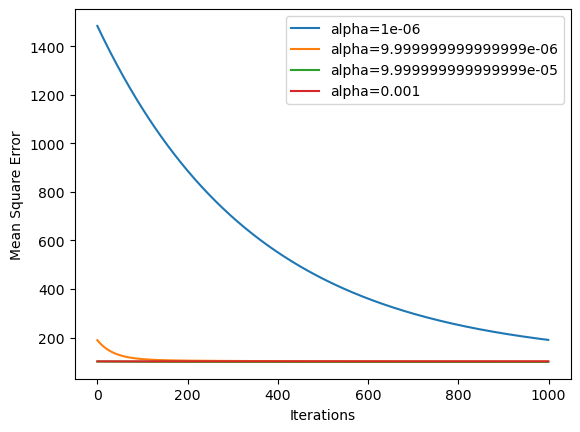

In [28]:
#mini batch gradient for Train data with normalisation
alphanorm=0.000001
batch_size=64
num_batches=int(m/64)
Loss_norm_test_full=[]
iterationsnorm=1000
input_size=n
output_size=1
model=nn.Linear(input_size,output_size)
while alphanorm <=0.001:
    optimizer = torch.optim.SGD(model.parameters(),lr=alphanorm)
    print(f'Learningrate={alphanorm}')
    J=[]
    for i in range(iterationsnorm):
        cost=0
        for batch in range(num_batches):
            x_batch = X_train_norm[batch*batch_size:(batch+1)*batch_size]
            y_batch = Y_train[batch*batch_size:(batch+1)*batch_size]
            prediction = model(x_batch)
            loss = mse(prediction,y_batch)*batch_size
            cost=cost+loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        J.append(cost/m)
        if i% math.ceil(iterationsnorm / 10) == 0:
            print(f"epochs {i:4d}: mean squared error {J[-1]:8.2f}   ")
    Y_test_predicted = model(X_test_norm)
    loss_norm_test = mse(Y_test,Y_test_predicted)
    Loss_norm_test_full.append(loss_norm_test)
    w_norm_final,b_norm_final=model.parameters()
    w_norm_final=w_norm_final.detach().numpy().squeeze()
    b_norm_final=b_norm_final.detach().numpy().squeeze()
    print(f'Mean square error of test data is: {loss_norm_test}')
    print(f'Feature weights after training:{w_norm_final}')
    print(f'The bias term after training: {b_norm_final}')
    plt.plot(J,label=f'alpha={alphanorm}')
    plt.legend()
    alphanorm=alphanorm*10
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.show()


In [31]:
#mini batch gradient descent for Test data with normalisation using pytorch
alphanorm=0.000001
for i in Loss_norm_test_full:
    print(f'alpha:{alphanorm}  Mean square error for test data:{i}')
    alphanorm=alphanorm*10

alpha:1e-06  Mean square error for test data:198.6885986328125
alpha:9.999999999999999e-06  Mean square error for test data:121.58905792236328
alpha:9.999999999999999e-05  Mean square error for test data:119.75131225585938
alpha:0.001  Mean square error for test data:119.71072387695312


# INFERENCES

a) Stochastic gradient descent was implemented from scratch for input data with normalisation. The results obtained were similar
for implementation from scratch and using Pytorch .It was found that as learning rate increases,covergence becomes faster, reaches an optimum limit,and then starts diverging.The number of iterations required for convergence were less when compared to Batch gradient descent.
The learning rate was taken in the range of 0.000001 to 0.001.
When implemented from scratch,the mean square error was found to be 102.55 for train data and 120.20 for test data(3000 epochs).
When using Pytorch, the mean square error was found to be 102.81 for train data and 120.90 for test data(500 epochs).
The time required was more in case of Pytorch when compared to the one implemented from scratch.

b) Mini batch gradient descent was implemented from scratch for input data with normalisation. The results obtained were similar for implementation from scratch and using Pytorch. The batch size taken was 64. It was found that as learning rate increases,covergence becomes faster, reaches an optimum limit,and then starts diverging.The number of iterations required for convergence were less when compared to Batch gradient descent. 
The learning rate was taken in the range of 0.00001 to 0.001.
When implemented from scratch,the mean square error was found to be 102.59 for train data and 119.53 for test data(1500 epochs).
When using Pytorch, the mean square error was found to be 99.73 for train data and 119.71 for test data(1000 epochs).The time required was very less in case of Pytorch(almost instantly) compared to the one from scratch.

Further,the respective graphs of 'Iterations v/s Mean square error are plotted' for different values of learning rate for detailed analysis.